In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()  #counting for null values in data set

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


INSIGHTS:

1]we can determine that the mean average age in titanic ship that aboarded was 29 while max was 80

2]Number of Siblings/Spouses Aboard was max of 8 people

3] while maximum Fare was 512 dollors

4] while parent child boared in titanic was range from with min(1) and max(8)

# Exploratory Data Analysis

<AxesSubplot:>

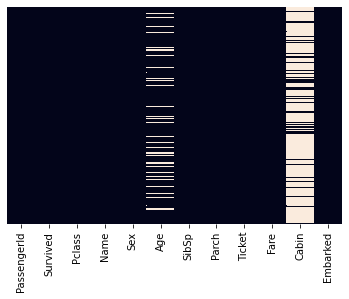

In [6]:
sns.heatmap(df.isna(),cbar=False,annot=False, yticklabels=False)     #Checking for nan values in dataframe

In [7]:
df.corr()["Survived"].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

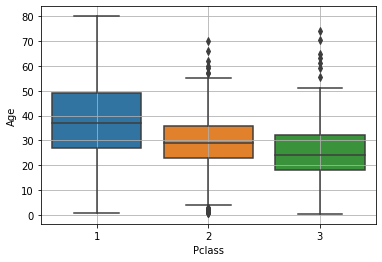

In [8]:
sns.boxplot(x="Pclass",y="Age",data=df)
plt.grid()

In [9]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if (pd.isnull(Age)):
        if (Pclass==1):
            return 37
        elif (Pclass==2):
            return 29
        else:
            return 24
        
    else:
        return Age

In [10]:
df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.drop('Cabin', axis=1, inplace=True)

In [13]:
df.isna().sum() # now checking for nan values after EDA  

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
df.dropna(inplace=True) # removing nan values

In [15]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [17]:
df.head()               #Final DataSet

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# VISUALISATION

# Count of survived people

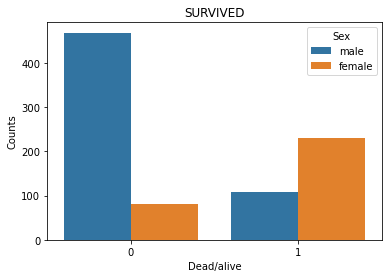

In [19]:
sns.countplot(x="Survived",hue="Sex",data=df)

plt.title("SURVIVED")
plt.xlabel("Dead/alive")
plt.ylabel("Counts")
plt.show()

# People affected according to class

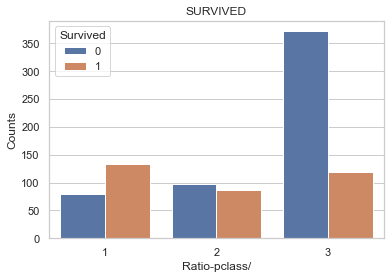

In [21]:
sns.set_theme(style="whitegrid")
sns.countplot(x="Pclass",hue="Survived",data=df)

plt.title("SURVIVED")
plt.xlabel("Ratio-pclass/")
plt.ylabel("Counts")
plt.show()

# Counting the ticket prices

In [23]:
df.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

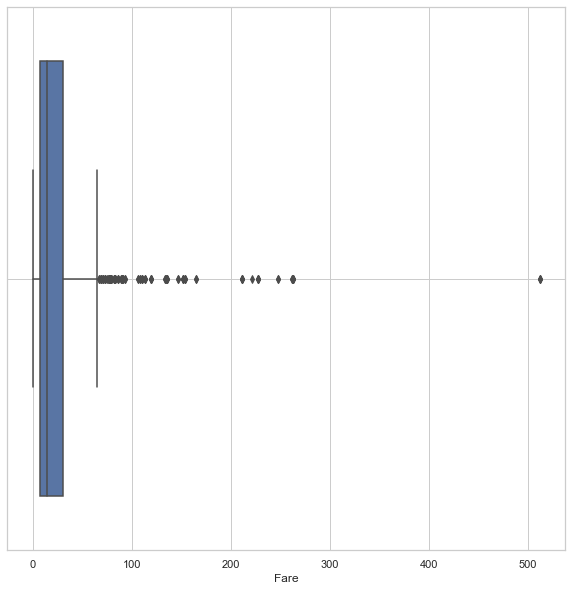

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Fare",data=df)
plt.grid(True)

# Number of Siblings/Spouses Aboard

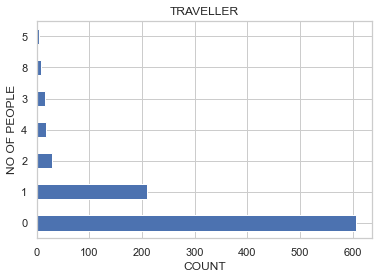

In [25]:
df.SibSp.value_counts().plot(kind="barh")
plt.title("TRAVELLER")
plt.xlabel("COUNT")
plt.ylabel("NO OF PEOPLE")
plt.show()

In [26]:
df.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

# Number of Parents/Children Aboard


<AxesSubplot:xlabel='Parch', ylabel='count'>

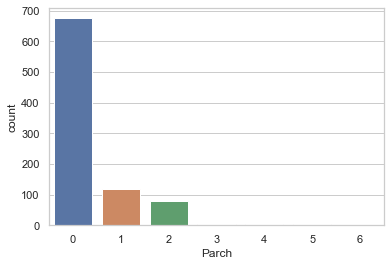

In [27]:
sns.countplot(x="Parch",data=df)

In [29]:
df.Parch.value_counts()

0    676
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

# BUILDING THE MODEL

# SEPERATING THE FEATURES AND LABELS

In [30]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [31]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [32]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Converting data into numerical using Encoder

In [33]:
from sklearn.compose import ColumnTransformer     
from sklearn.preprocessing import OneHotEncoder

In [34]:
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),["Sex","Embarked"])],remainder="passthrough")
x=np.array(ct.fit_transform(x))

In [35]:
x

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Splitting into train and test data

In [37]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

# Creating the best model with help of logistic,knn and svc

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [40]:
def my_models(model):   #creating function
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    print(f"{accuracy_score(ytest,ypred)}\n\n{classification_report(ytest,ypred)}\n\n{confusion_matrix(ytest,ypred)}")

In [41]:
model=[]
model.append(("knn-------",KNeighborsClassifier()))
model.append(("logistic-------",LogisticRegression()))
model.append(("support vector-------",SVC()))


for name,model in model:
    print(name)
    my_models(model)

knn-------
0.7219730941704036

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       138
           1       0.65      0.60      0.62        85

    accuracy                           0.72       223
   macro avg       0.70      0.70      0.70       223
weighted avg       0.72      0.72      0.72       223


[[110  28]
 [ 34  51]]
logistic-------
0.8430493273542601

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       138
           1       0.79      0.80      0.80        85

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223


[[120  18]
 [ 17  68]]
support vector-------
0.6502242152466368

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       138
           1       0.56      0.38      0.45        85

    accuracy             

# HYPER PARAMETER

In [42]:
accuracy=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

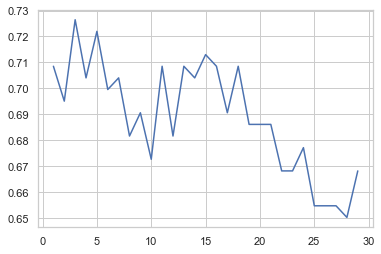

In [43]:
plt.plot(range(1,30),accuracy)
plt.grid(True)

INSIGHTS:
    
Above graph show 3 has maximum accuracy so selecting 3 as n_neighbors

# Using of hyperparameter in model for better results

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
para={"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001],"kernel":['rbf']}

grid=GridSearchCV(SVC(),para,refit=True,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.2s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [47]:
grid.best_params_   #using this parameter for tuning in svm

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [48]:
model=[]
model.append(("knn-------",KNeighborsClassifier(n_neighbors=3)))
model.append(("logistic-------",LogisticRegression(solver='newton-cg')))
model.append(("support vector-------",SVC(C=100, gamma=0.001,kernel='rbf')))


for name,model in model:
    print(name)
    my_models(model)

knn-------
0.726457399103139

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       138
           1       0.64      0.65      0.64        85

    accuracy                           0.73       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.73      0.73      0.73       223


[[107  31]
 [ 30  55]]
logistic-------
0.852017937219731

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       138
           1       0.80      0.81      0.81        85

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223


[[121  17]
 [ 16  69]]
support vector-------
0.8295964125560538

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       138
           1       0.76      0.80      0.78        85

    accuracy               

# CONCLUSION

A] PREPROCESSING

1]we can determine that the mean average age in titanic ship that aboarded was 29 while max was 80

2]Number of Siblings/Spouses Aboard was max of 8 people

3] while maximum Fare was 512 dollors

4] while parent child boared in titanic was range from with min(1) and max(8)

B] VISUALISATION

1]No of people lossed there life were more than 500+ out of which 'male' was the most as of we can say that female and            children were resuced 1st -while only 300+ survived in the accident

2]As people of 1st class has survived more in the incident as compare to that of 2nd and 3rd class people as 1st class have given first priority in boarding the rescue boat

3]We can conclude that from data ticket price ranged from 0-75 dollar while maximum ticket sold was for 512 dollar,there         were many ticket sold in between 75-300 dollar this may be extra charges of last minute booking

4] There were 5 such people having 8 sibling/spouses onboared with them,while 606 were without any siblings

5]There were more than 600+couple in the ship while couple having 1 child with them were 118 and so on


C] BUILDING MODEL

By using try and error

  -we can conclude that the accuarcy of the model by using [logistic Regression] the model give the maximum accuracy=85%
  
  -while that of using [svm]=82%
  
  -And of [knn]=72%

# RESULT

A] Before all the hyperparameter Tuning for LOGISTIC , KNN, SVM

ACCURACY[KNN]==0.7219730941704036

ACCURACY[LOGISTIC]==0.8430493273542601

ACCURACY[SVM]==0.6502242152466368


B] After all the hyperparameter Tuning for LOGISTIC , KNN, SVM

ACCURACY[KNN]==0.726457399103139

ACCURACY[LOGISTIC]==0.852017937219731

ACCURACY[SVM]=0.8295964125560538